In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json

# TODO: voited more then were registered
# TODO: forgery for each city
# TODO: how many golos-data cover real, it should be % of all data
# TODO: Filters: all, all big cities, each city, not bit cities
# TODO: Benford law 

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

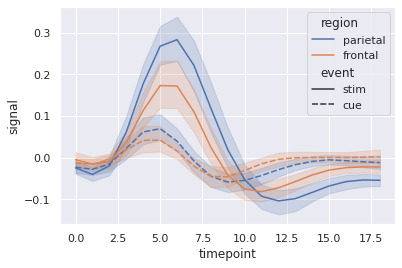

In [2]:
# this is a test

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [3]:
with open("data.json") as datafile:
    data = json.load(datafile)

In [4]:
# All Stations
print(len(data["stations"].keys()))

5767


In [5]:
# Stations without data
no_data_stations = {}
for code, station in data["stations"].items():
    if "choices" not in station:
        no_data_stations[code] = station
print(len(no_data_stations.keys()))

59


In [6]:
# Declare vars
candidates = [
    'tihanovkaja',
    'lukashenko', 
    'cherechen', 
    'dmitriyev', 
    'kanopatskaja', 
    'against', 
    'corrupted', 
    'ignore',   
]
counts = {}
for candidate in candidates:
    counts[candidate] = []
counts["index"] = []

In [7]:
for candidate in candidates:
    counts[candidate].append(data["total"]["choices"][candidate]["officialVotes"])
counts["index"].append("Official")

for candidate in candidates:
    counts[candidate].append(data["total"]["choices"][candidate]["registered"])
counts["index"].append("Registered")

for candidate in candidates:
    counts[candidate].append(data["total"]["choices"][candidate]["photoVoices"])
counts["index"].append("With Photo")

In [11]:
# how to get the first digit of a number
print(int(str(423)[0]))

4


In [8]:
df = pd.DataFrame(counts)
df.set_index("index")

,tihanovkaja,lukashenko,cherechen,dmitriyev,kanopatskaja,against,corrupted,ignore
index,,,,,,,,
Official,690654,4613712,66256,69713,96791,265023,0,0
Registered,1003717,10100,3724,6778,2491,18137,1712,2685
With Photo,536546,658,1201,2047,688,4357,450,0
